In [1]:
library("devtools")
library("NetHypGeom")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: ggplot2


In [18]:
net <- ps_model(N = 500, avg.k = 10, gma = 2.0, Temp = 0.01)

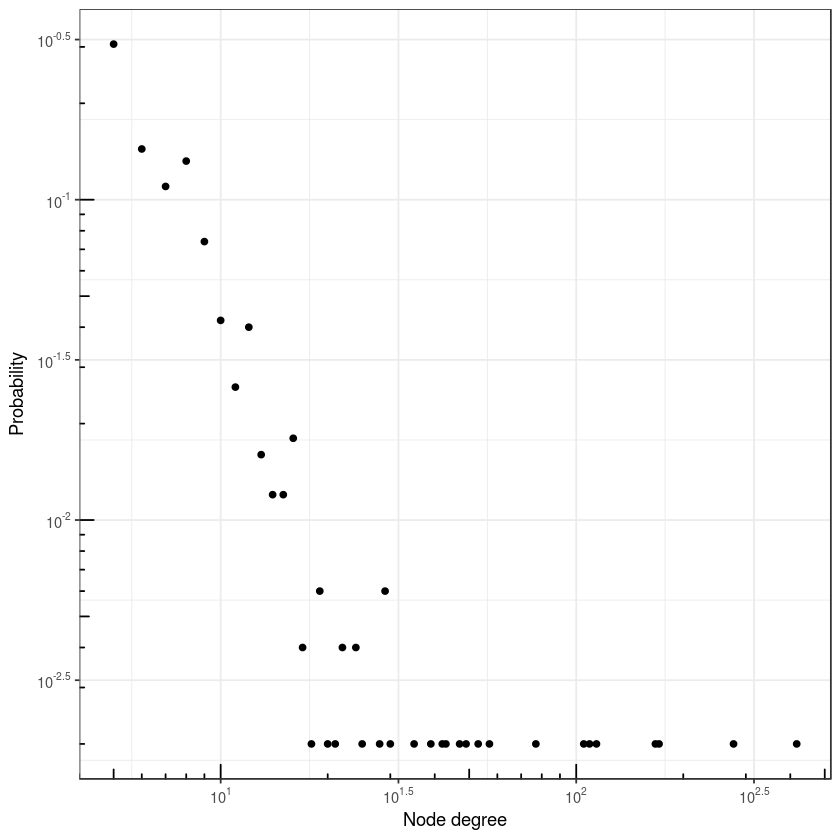

In [19]:
plot_degree_distr(net$network)

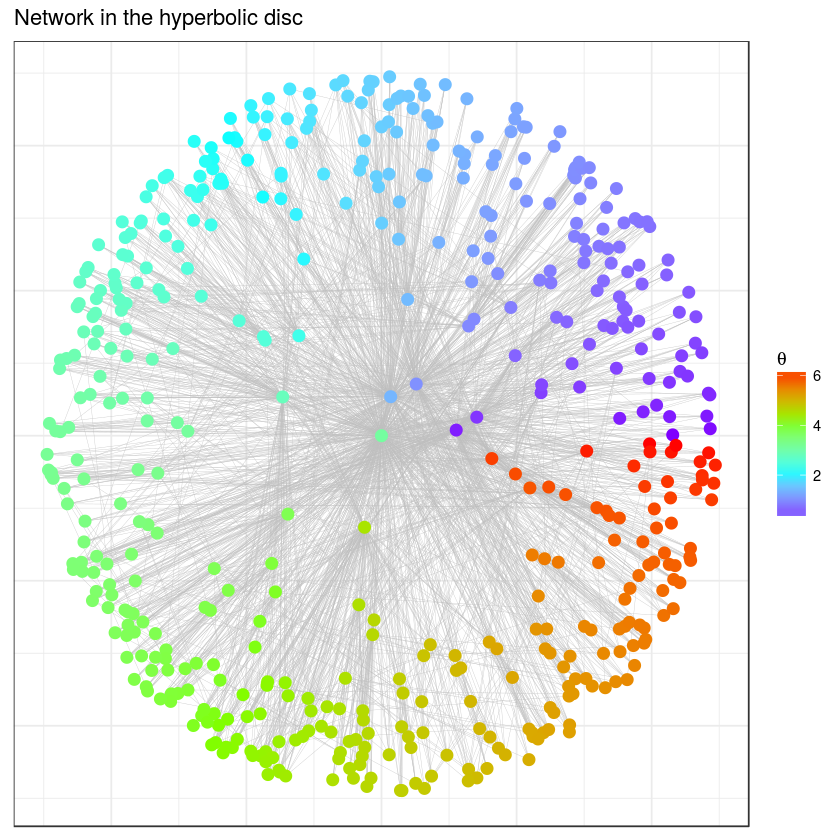

In [20]:
plot_hyperbolic_net(network = net$network, nodes = net$polar, node.colour = net$polar$theta)

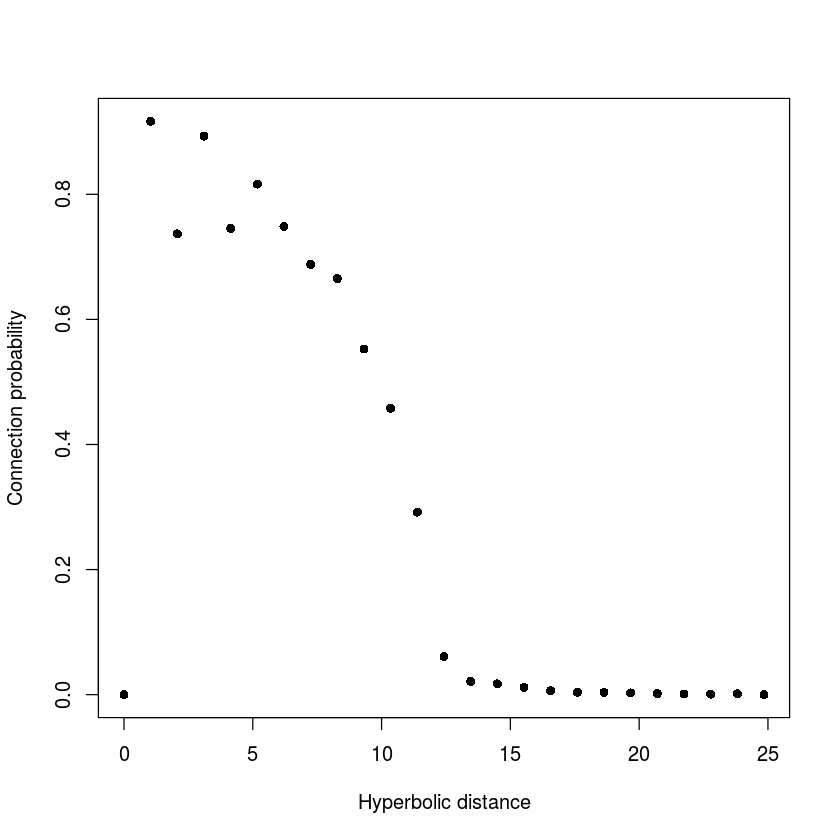

In [21]:
conn <- get_conn_probs(net = net$network, polar = net$polar, bins = 25)
plot(conn$dist, conn$prob, pch = 16, xlab = "Hyperbolic distance", ylab = "Connection probability")

In [22]:
fit_power_law(degree(net$network))$alpha

[1] 2.799399

In [23]:
# Form vectors of random non-redundant source-target pairs
N <- vcount(net$network)
st <- 1000

# We subtract 1, because the formulae to go from linear upper 
# diagonal indexing to (i,j) are zero-based
k <- sample(N*(N-1)/2, st) - 1
sources <- (N - 2 - floor(sqrt(-8*k + 4*N*(N-1)-7)/2.0 - 0.5))
targets <- (k + sources + 1 - N*(N-1)/2 + (N-sources)*((N-sources)-1)/2)

# Back to 1-based indexing
sources <- sources + 1
targets <- targets + 1

# Analyse the network's navigability
hop.stretch <- greedy_route_packets(net$network, net$polar, sources, targets)

# Compute the fraction of succesfully delivered packets
sum(hop.stretch > 0)/st

[1] 0.976

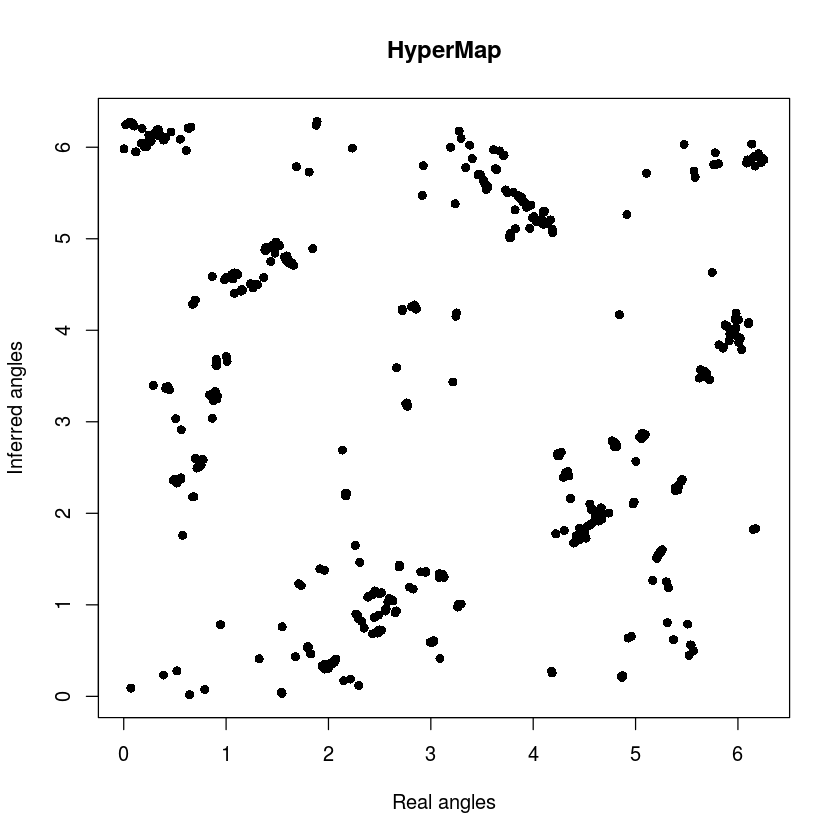

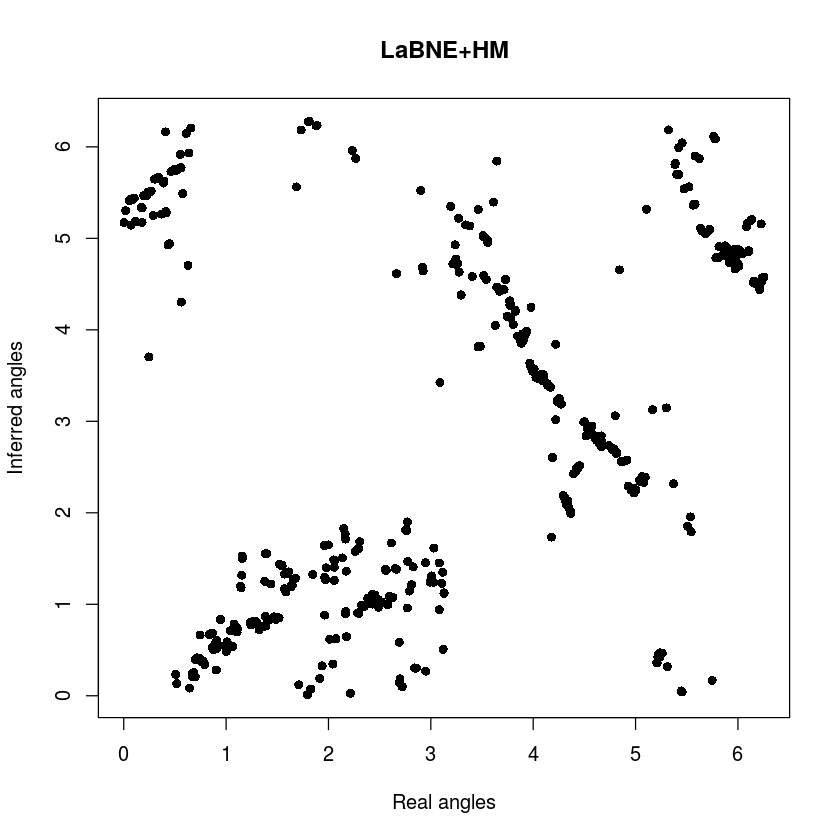

In [24]:
# To embed the network using HyperMap, we set LaBNE+HM's window to 2*pi
hm <- labne_hm(net = net$network, Temp = 0.15, k.speedup = 10, w = 2*pi)

# To embed with LaBNE+HM, we reduce HyperMap's search space from 2*pi 
# to a small window of 15 degrees around LaBNE's angles
lh <- labne_hm(net = net$network, Temp = 0.15, k.speedup = 10, w = pi/12)

# Comparison between real and HyperMap-inferred angles and real and LaBNE+HM-inferred angles
plot(net$polar$theta, hm$polar$theta, pch = 16, 
     xlab = "Real angles", ylab = "Inferred angles", main = "HyperMap")
plot(net$polar$theta, lh$polar$theta, pch = 16, 
     xlab = "Real angles", ylab = "Inferred angles", main = "LaBNE+HM")

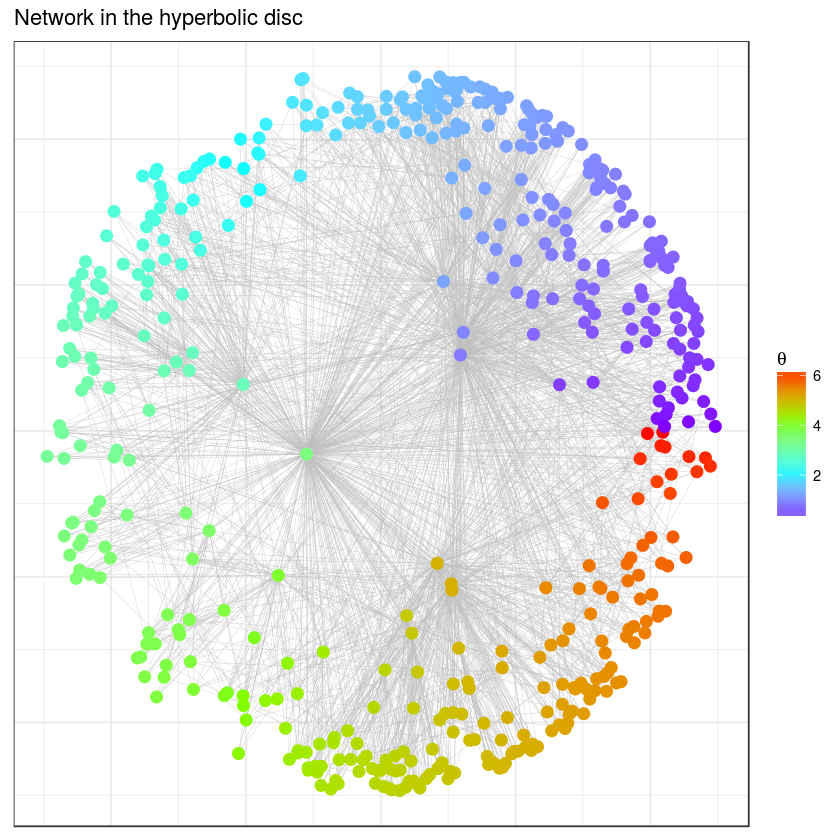

In [26]:
plot_hyperbolic_net(network = lh$network, nodes = lh$polar, node.colour = lh$polar$theta)

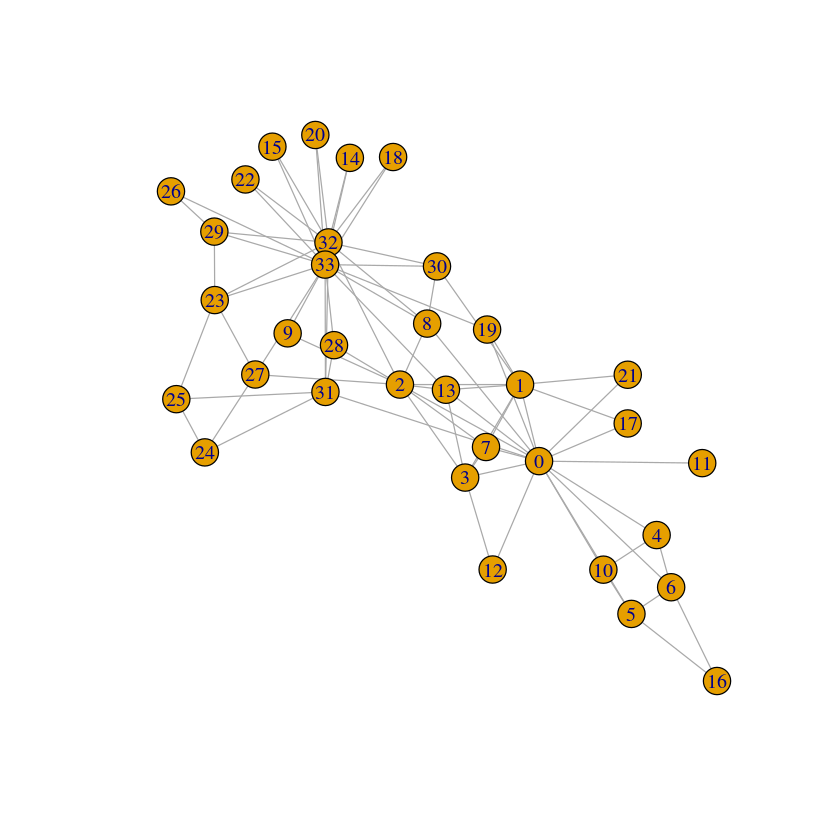

In [17]:
G <- read_graph("embedded_karate.gml", format = "gml")
plot(G, vertex.size=10)

In [18]:
fit_power_law(degree(G))

$continuous
[1] FALSE

$alpha
[1] 2.125822

$xmin
[1] 2

$logLik
[1] -72.27433

$KS.stat
[1] 0.09985558

$KS.p
[1] 0.8971613

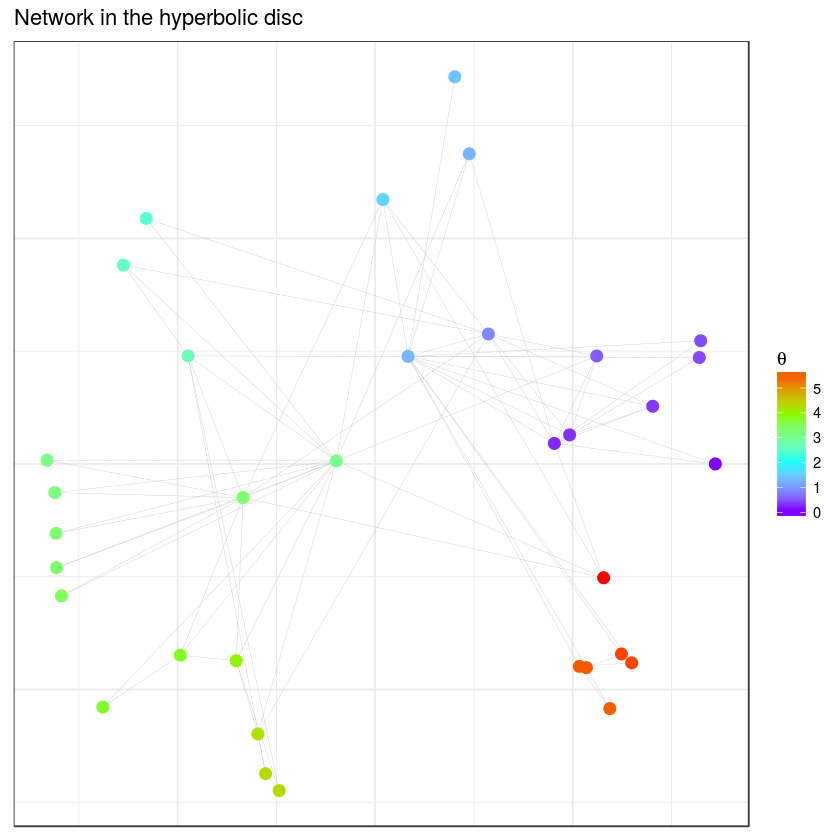

In [19]:
lh <- labne_hm(net = G, Temp = 0.15, k.speedup = 10)
plot_hyperbolic_net(network = lh$network, nodes = lh$polar, node.colour = lh$polar$theta)

In [20]:
polar <- lh$polar

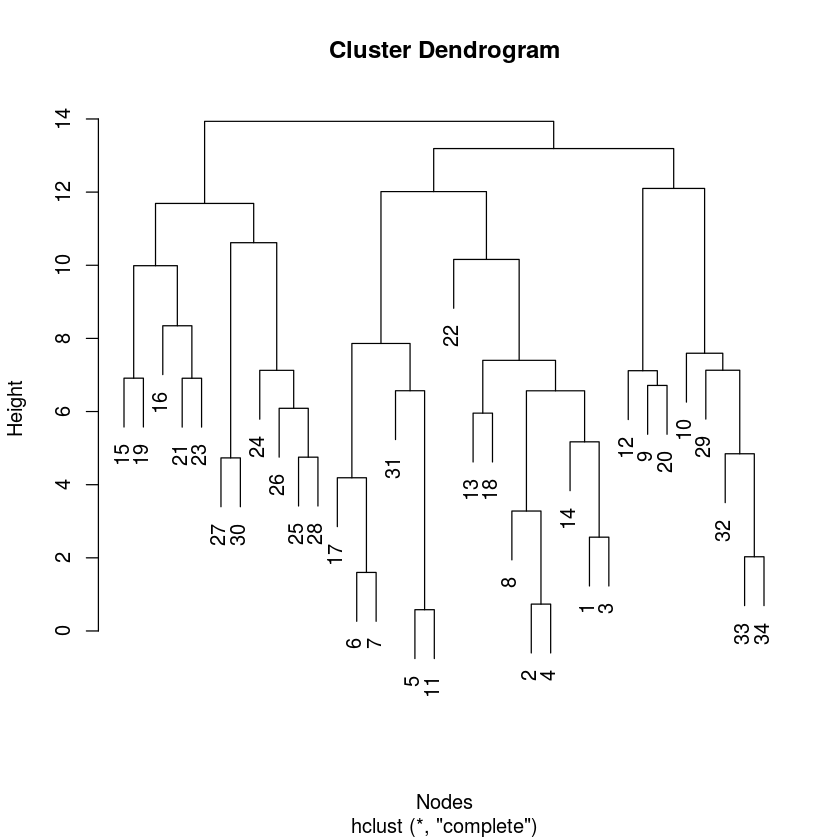

In [21]:
distances <- sapply(1:nrow(polar), function(i) {
    sapply(1:nrow(polar), function(j) {
        hyperbolic_dist(polar[i,], polar[j,])
    })
})

clusters <- hclust(as.dist(distances))
plot(clusters, xlab = "Nodes")

In [22]:
assignments <- cutree(clusters, k = c(2))

In [16]:
library(NMI)

In [28]:
real_labels <- data.frame(nodes=V(G)$id, labels=V(G)$club)
predicted_labels <- data.frame(nodes=V(G)$id, labels=assignments)

In [29]:
NMI(real_labels, predicted_labels)

$value
[1] 0.4156484

In [30]:
kmea <- kmeans(as.dist(distances), 2)

In [31]:
kmeans_predicted_labels <- data.frame(nodes=V(G)$id, labels=kmea$cluster)

In [32]:
NMI(real_labels, kmeans_predicted_labels)

$value
[1] 0.3108949